# Single model

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import SimulatedMinimumDistance as SMD
import figs
import funs

# Global modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Solve and simulate model

In [2]:
SingleEst = SMD.load_est(name='Single')
Single = RetirementClass(**SingleEst)
Single.solve()
Single.simulate(accuracy=True,tax=True)

### Retirement probabilities from solution

Women

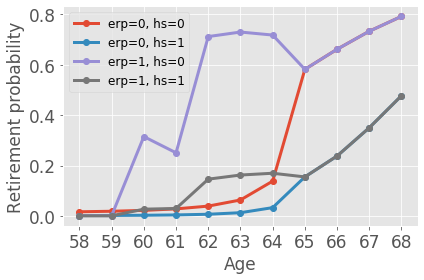

In [3]:
G = figs.choice_probs(Single,ma=0)
G['legendsize'] = 12
G['marker'] = 'o'
figs.MyPlot(G,linewidth=3).savefig('figs/Model/Single_ChoiceProb_Women.png')

Men

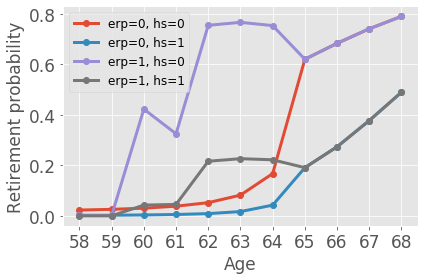

In [4]:
G = figs.choice_probs(Single,ma=1)
G['legendsize'] = 12
G['marker'] = 'o'
figs.MyPlot(G,linewidth=3).savefig('figs/Model/Single_ChoiceProb_Men.png')

### Consumption functions

Retired

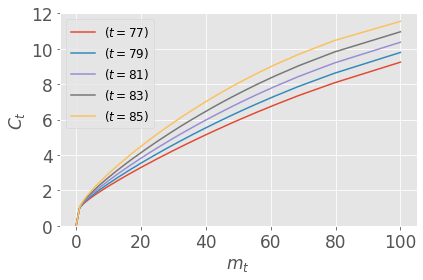

In [5]:
G = figs.policy(Single,var='c',T=list(range(77,87))[::2],MA=[0],ST=[3],RA=[0],D=[0],label=['t'])
G['legendsize'] = 12
figs.MyPlot(G,ylim=[0,12],save=False)

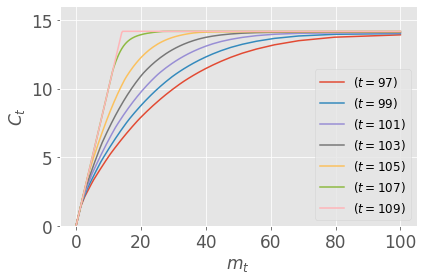

In [6]:
G = figs.policy(Single,var='c',T=list(range(97,111))[::2],MA=[0],ST=[3],RA=[0],D=[0],label=['t'])
G['legendsize'] = 12
figs.MyPlot(G,ylim=[0,16],save=False)

Working

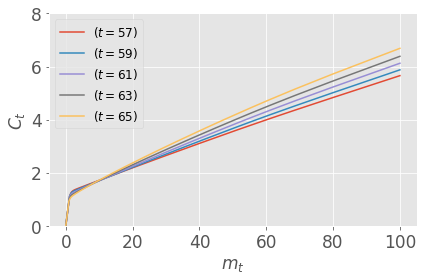

In [7]:
G = figs.policy(Single,var='c',T=list(range(57,67))[::2],MA=[0],ST=[3],RA=[0],D=[1],label=['t'])
G['legendsize'] = 12
figs.MyPlot(G,ylim=[0,8],save=False)

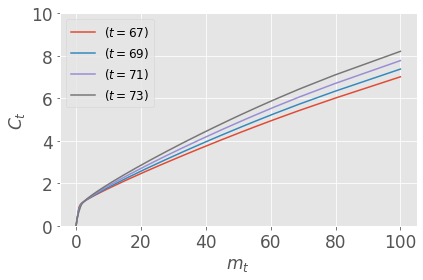

In [8]:
G = figs.policy(Single,var='c',T=list(range(67,75))[::2],MA=[0],ST=[3],RA=[0],D=[1],label=['t'])
G['legendsize'] = 12
figs.MyPlot(G,ylim=[0,10],save=False)

### Simulation - Retirement

In [9]:
def rename(G_lst):
    G_lst[0]['label'] = ['High skilled']
    G_lst[1]['label'] = ['Base']
    G_lst[2]['label'] = ['Low skilled']

Women

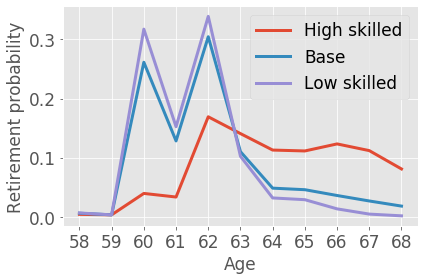

In [10]:
G_hs = figs.retirement_probs(Single,MA=[0],ST=[1,3])
G_base = figs.retirement_probs(Single,MA=[0])
G_ls = figs.retirement_probs(Single,MA=[0],ST=[0,2])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

Men

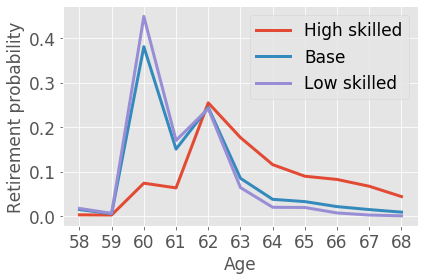

In [11]:
G_hs = figs.retirement_probs(Single,MA=[1],ST=[1,3])
G_base = figs.retirement_probs(Single,MA=[1])
G_ls = figs.retirement_probs(Single,MA=[1],ST=[0,2])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

### Simulation - Consumption

Women

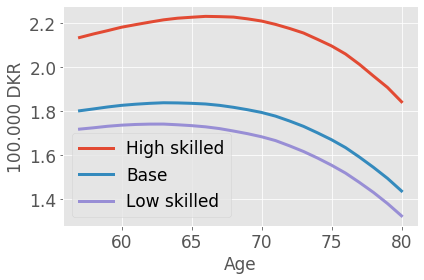

In [12]:
G_hs = figs.lifecycle(Single,var='c',MA=[0],ST=[1,3],ages=[57,80])
G_base = figs.lifecycle(Single,var='c',MA=[0],ages=[57,80])
G_ls = figs.lifecycle(Single,var='c',MA=[0],ST=[0,2],ages=[57,80])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

Men

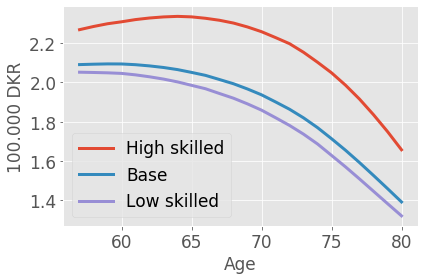

In [13]:
G_hs = figs.lifecycle(Single,var='c',MA=[1],ST=[1,3],ages=[57,80])
G_base = figs.lifecycle(Single,var='c',MA=[1],ages=[57,80])
G_ls = figs.lifecycle(Single,var='c',MA=[1],ST=[0,2],ages=[57,80])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

### Simulation - Wealth

Women

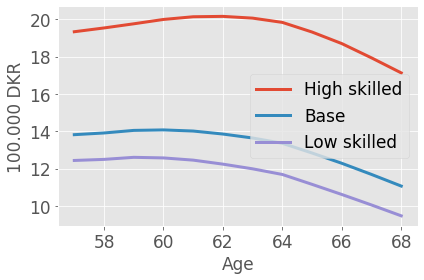

In [15]:
G_hs = figs.lifecycle(Single,var='m',MA=[0],ST=[1,3],ages=[57,68])
G_base = figs.lifecycle(Single,var='m',MA=[0],ages=[57,68])
G_ls = figs.lifecycle(Single,var='m',MA=[0],ST=[0,2],ages=[57,68])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

Men

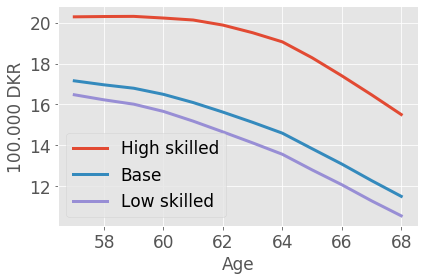

In [17]:
G_hs = figs.lifecycle(Single,var='m',MA=[1],ST=[1,3],ages=[57,68])
G_base = figs.lifecycle(Single,var='m',MA=[1],ages=[57,68])
G_ls = figs.lifecycle(Single,var='m',MA=[1],ST=[0,2],ages=[57,68])
rename([G_hs,G_base,G_ls])
figs.MyPlot([G_hs,G_base,G_ls],linewidth=3,save=False)

### Euler errors

Total: -5.522024292361604


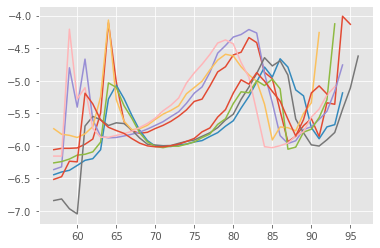

In [18]:
MA = [0,1]
ST = [0,1,2,3]
ages = [Single.par.start_T,Single.par.end_T-1]
for ma in MA:
    for st in ST:
        funs.log_euler(Single,MA=[ma],ST=[st],ages=ages,plot=True)
print('Total:',funs.log_euler(Single,ages=ages)[0])

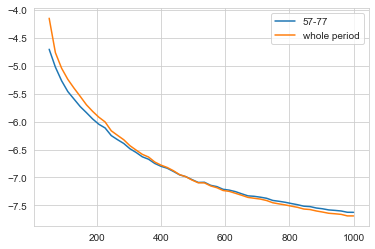

In [8]:
Na = Single.par.Na
funs.resolve(Single,Na=np.linspace(50,1000))
Single.par.Na = Na
Single.recompute() # reset

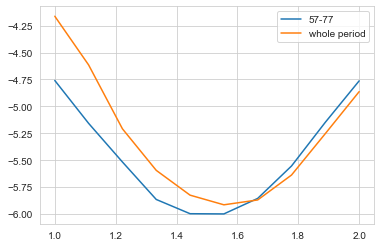

In [9]:
a_phi = test.par.a_phi
funs.resolve(test,a_phi = np.linspace(1.0,2.0,num=10))
test.par.a_phi = a_phi
test.solve(recompute=True) # reset

# Time the model and simulation

In [36]:
Single.par.simT=12
Single.recompute()

In [37]:
def solve():
    Single.solve() 
    
def simulate():
    Single.simulate()
    
funcs = [solve,simulate]
argu = dict([(funcs[0], []),
             (funcs[1], [])])
names = dict([(funcs[0], 'solve: #a=' + str(Single.par.Na)),
              (funcs[1], 'simulate: T=12, N=' + str(Single.par.simN))])

In [ ]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=50)

In [12]:
funs.my_timer(funcs,argu,names,unit='s',ndigits=2,Ntimes=50)

time unit is: s
+--------------------------+------+--------+------+------+-------+
|           func           |  lq  | median | mean |  uq  | neval |
+--------------------------+------+--------+------+------+-------+
|      solve: #a=200       | 0.14 |  0.15  | 0.15 | 0.16 |  50.0 |
| simulate: T=20, N=100000 | 0.8  |  0.84  | 0.85 | 0.88 |  50.0 |
+--------------------------+------+--------+------+------+-------+
